# Simulation command generation from simulation sheet
>'It's turtles all the way down!'

Plan: 
- Have array of sample settings, maybe optimized to give comparable $\sigma t$ to give comparable signal strength.

In [90]:
from definitions import s_t
import numpy as np
import pandas as pd
import os 


# Sample (R, t) [(m,m)]
samples = [(1e-6, 1e-3), (300e-9, 3e-3), (50e-9, 10e-3)]
# Source (L0, DL) [(m,m)]
sources = [(2.165, 0.02165), (4.321, 0.04321), (8, 0.8)]
# Universal sample parameters (?)
phi = 0.02

delta_rho = 2e14 # 1/m^2 (?)
for (R, t) in samples:
    print(F"R = {R * 1e9}nm, t = {t}m:")
    for (L0, DL) in sources:
        st = s_t(R,t, L0 * 1e-10, phi, delta_rho)
        permissible = st < 0.8 and st >= 0.1
        print(f"\t lambda = {L0} Å: sigma * t: {st}, permissible: {permissible}")
        sigma = s_t(R,t, L0 * 1e-10) / t
        t_optimum = 0.45 / sigma
        print(f"\t Optimal t: t={t_optimum}")
        # print(s_t(R,t_optimum, L0 * 1e-10))

R = 1000.0nm, t = 0.001m:
	 lambda = 2.165 Å: sigma * t: 0.055121766, permissible: False
	 Optimal t: t=0.0012033042843946863
	 lambda = 4.321 Å: sigma * t: 0.21957144215999996, permissible: True
	 Optimal t: t=0.0003020805280445737
	 lambda = 8 Å: sigma * t: 0.75264, permissible: True
	 Optimal t: t=8.812746756909194e-05
R = 300.0nm, t = 0.003m:
	 lambda = 2.165 Å: sigma * t: 0.0496095894, permissible: False
	 Optimal t: t=0.004011014281315621
	 lambda = 4.321 Å: sigma * t: 0.19761429794399998, permissible: True
	 Optimal t: t=0.0010069350934819121
	 lambda = 8 Å: sigma * t: 0.677376, permissible: True
	 Optimal t: t=0.0002937582252303065
R = 50.0nm, t = 0.01m:
	 lambda = 2.165 Å: sigma * t: 0.027560883, permissible: False
	 Optimal t: t=0.024066085687893726
	 lambda = 4.321 Å: sigma * t: 0.10978572107999997, permissible: True
	 Optimal t: t=0.006041610560891475
	 lambda = 8 Å: sigma * t: 0.37632, permissible: True
	 Optimal t: t=0.0017625493513818387


In [91]:
from definitions import s_t


# Sample (R, t) [(m,m)]
samples = [(1e-6, 1e-3), (300e-9, 1e-3), (50e-9, 10e-3)]
# Source (L0, DL) [(m,m)]
sources = [(4.321, 0.04321), (8, 0.8)]
# Universal sample parameters (?)
phi = 0.015

delta_rho = 2.08e14 # 1/m^2 (?)
for (R, t) in samples:
    print(F"R = {R * 1e9}nm, t = {t}m:")
    for (L0, DL) in sources:
        st = s_t(R,t, L0 * 1e-10, phi, delta_rho)
        permissible = st < 0.8 and st >= 0.1
        print(f"\t lambda = {L0} Å: ")
        print(f"\t\ts*t: {st}\n\t\t0.1 <= s*t <= 0.8: {permissible}")
        sigma = s_t(R,t, L0 * 1e-10) / t
        t_optimum = 0.45 / sigma
        # print(f"\t Optimal t: t={t_optimum}")
        # print(s_t(R,t_optimum, L0 * 1e-10))

R = 1000.0nm, t = 0.001m:
	 lambda = 4.321 Å: 
		s*t: 0.179025110787744
		0.1 <= s*t <= 0.8: True
	 lambda = 8 Å: 
		s*t: 0.613656576
		0.1 <= s*t <= 0.8: True
R = 300.0nm, t = 0.001m:
	 lambda = 4.321 Å: 
		s*t: 0.0537075332363232
		0.1 <= s*t <= 0.8: False
	 lambda = 8 Å: 
		s*t: 0.18409697279999998
		0.1 <= s*t <= 0.8: True
R = 50.0nm, t = 0.01m:
	 lambda = 4.321 Å: 
		s*t: 0.08951255539387198
		0.1 <= s*t <= 0.8: False
	 lambda = 8 Å: 
		s*t: 0.30682828799999995
		0.1 <= s*t <= 0.8: True


In [92]:
print("{:,.3e}".format(np.sqrt(6.1e-7) * 1e18))

7.810e+14


In [93]:
from definitions import *


# Sample (R, t) [(m,m)]
samples = [(1e-6, 1e-3), (300e-9, 1e-3), (50e-9, 10e-3)]
Rs = [2e-6, 300e-9, 50e-9]
# Source (L0, DL) [(m,m)]
sources = [(4.321, 0.04321), (8, 0.8)]

# Source sample (thickness) pairing (L0, DL, R, t)
source_sample = [(4.321, 0.04321, 2e-6, 1e-3), (8, 0.8, 2e-6, 1e-3), (4.321, 0.04321, 300e-9, 10e-3), (8, 0.8, 300e-9, 5e-3), (4.321, 0.04321, 50e-9, 10e-3), (8, 0.8,50e-9, 10e-3)]

thickness_map = {
    (4.321, 2e-6):  1e-3,
    (8, 2e-6):  1e-3,
    (4.321, 300e-9): 10e-3,
    (8, 300e-9): 5e-3,
    (4.321, 50e-9): 10e-3,
    (8, 50e-9): 10e-3,
}
# Universal sample parameters (?)
phi = 0.015

delta_rho = 1.8e14 # 1/m^2 (?)
print(f"Constant parameters: drho = {delta_rho * 1e-14}e14 m^-2; phi = {phi}")
for (L0, DL, R, t) in source_sample:
    # print(thickness_map[(L0, R)])
    print(F"R = {R * 1e9}nm, t = {round(t * 1e3,2)}mm, lambda = {L0} Å:")
    st = s_t(R,t, L0 * 1e-10, phi, delta_rho)
    permissible = st < 0.8 and st >= 0.1
    print(f"\ts*t: {st}\n\t0.1 <= s*t <= 0.8: {permissible}")
    sigma = s_t(R,t, L0 * 1e-10) / t
    t_optimum = 0.38 / sigma

Constant parameters: drho = 1.8e14 m^-2; phi = 0.015
R = 2000.0nm, t = 1.0mm, lambda = 4.321 Å:
	s*t: 0.26814042111329994
	0.1 <= s*t <= 0.8: True
R = 2000.0nm, t = 1.0mm, lambda = 8 Å:
	s*t: 0.9191232
	0.1 <= s*t <= 0.8: False
R = 300.0nm, t = 10.0mm, lambda = 4.321 Å:
	s*t: 0.4022106316699499
	0.1 <= s*t <= 0.8: True
R = 300.0nm, t = 5.0mm, lambda = 8 Å:
	s*t: 0.6893424
	0.1 <= s*t <= 0.8: True
R = 50.0nm, t = 10.0mm, lambda = 4.321 Å:
	s*t: 0.06703510527832499
	0.1 <= s*t <= 0.8: False
R = 50.0nm, t = 10.0mm, lambda = 8 Å:
	s*t: 0.22978079999999998
	0.1 <= s*t <= 0.8: True


In [94]:
import pandas as pd
import os 
df = pd.read_csv('simulations_new.csv', sep=',', header=0)

FWHM_env_min = 0.005
class Instrument:
    def __init__(self, id: str,  prec_type: str, L0: float, DL: float, theta_0: float, By_min: float, By_max: float, L_s: float = 1.8, L_1: float = 4, L_2: float = 2):
        self.id = id
        self.prec_type = prec_type
        self.L0 = L0
        self.DL = DL
        self.theta_0 = theta_0
        self.By_min = By_min 
        self.By_max = By_max
        self.L_s = L_s
        self.L_1 = L_1
        self.L_2 = L_2

    def delta_min(self):
        return compute_z(self.By_min,self.theta_0,self.L0,self.L_s)
    
    def delta_max_named(self):
        d_max_field = self.delta_max_B_field()
        delta_max_env = self.delta_max_envelope()
        delta_max_ten_samples = self.delta_max_sampling()
        maxes = [(d_max_field, 'B strength'), (delta_max_env, 'envelope'), (delta_max_ten_samples, 'sampling')]
        (d_max, max_name) = min(maxes)
        return (d_max, max_name) 

    def delta_max(self):
        return self.delta_max_named()[0]
    
    def delta_max_B_field(self):
        # Due to the focussing condition, one component will have field By_max/2 and the other By_max, giving a delta of By_max/2
        return compute_z(self.By_max * (1 - self.L_2 / self.L_1), self.theta_0, self.L0, self.L_s)

    def delta_max_sampling(self, samples = 10):
        f_s = 1/detector_pixel_size
        f_super_sampled = f_s / samples
        delta_max_sampling = f_super_sampled * self.L0 * self.L_s
        return delta_max_sampling

    def delta_max_envelope(self):
        delta_max_env = np.sqrt(2 * np.log(2)) * self.L0**2 * self.L_s / (np.pi * self.DL * FWHM_env_min)
        return delta_max_env
    
    def delta_range(self):
        return self.delta_min(), self.delta_max()

    def __str__(self):
        d_min = self.delta_min()
        d_max_field = self.delta_max_B_field()
        delta_max_env = self.delta_max_envelope()
        delta_max_ten_samples = self.delta_max_sampling()
        # print(F"Max delta ideal sampling (10 samples per period) (f_0 = {round(f_ten_samples*1e-3)}mm^-1: {round(delta_max_ten_samples * 1e9,2)}nm")
        maxes = [(d_max_field, 'B strength'), (delta_max_env, 'envelope'), (delta_max_ten_samples, 'sampling')]
        (d_max, max_name) = min(maxes)
        print(f"AAAAHHHH: {self.delta_max()}")
        # print(min_max)
        return f"""Instrument ID {self.id}
    \tSource: L0 = {self.L0 * 1e10} Å; sigma_L = {self.DL * 1e10} Å
    \tPrecession device: type = {self.prec_type}; theta_0 = {round(self.theta_0,2)} rad; By_min = {self.By_min * 1e3}mT; By_max = {self.By_max * 1e3}mT
    \tL_1 = {round(self.L_1, 2)}m; L_2 = {round(self.L_2, 2)}m;  L_s = {round(self.L_s, 2)}m
    \tdelta range from B strength: {round(d_min * 1e9,2)} - {round(d_max_field * 1e9, 2)}nm
    \tdelta limit for envelope FWHM >= {FWHM_env_min*1e3}mm: {round(delta_max_env * 1e9,2)}nm
    \tmax delta for sampling at 10/s (f_0 = {round(f_s / 10 *1e-3)}mm^-1): {round(delta_max_ten_samples * 1e9,2)}nm
    \tfinal delta range: {round(d_min * 1e9,2)} - {round(d_max * 1e9, 2)}nm ({max_name} limited)"""
    

# print(df.values)
instrs = []
for r in df.values:
    # print(r)
    id = r[0]
    L0 = float(r[1]) * 1e-10
    DL = float(r[2]) * 1e-10 / FWHM_factor
    prec = r[4]
    theta_0 = np.deg2rad(float(r[5]))
    By_min = float(r[6]) * 1e-3
    By_max = float(r[7]) * 1e-3
    instr = Instrument(id, prec, L0, DL, theta_0, By_min, By_max)
    instrs.append(instr)

for instr in instrs:
    print(str(instr))

AAAAHHHH: 1.9395527016112434e-06
Instrument ID 1a
    	Source: L0 = 2.165 Å; sigma_L = 0.008493218002880191 Å
    	Precession device: type = foil; theta_0 = 0.1 rad; By_min = 0.3mT; By_max = 30.0mT
    	L_1 = 4m; L_2 = 2m;  L_s = 1.8m
    	delta range from B strength: 38.79 - 1939.55nm
    	delta limit for envelope FWHM >= 5.0mm: 7446.01nm
    	max delta for sampling at 10/s (f_0 = 10mm^-1): 3897.0nm
    	final delta range: 38.79 - 1939.55nm (B strength limited)
AAAAHHHH: 3.9167872156148405e-07
Instrument ID 1b
    	Source: L0 = 2.165 Å; sigma_L = 0.008493218002880191 Å
    	Precession device: type = wsp; theta_0 = 0.79 rad; By_min = 0.1mT; By_max = 63.0mT
    	L_1 = 4m; L_2 = 2m;  L_s = 1.8m
    	delta range from B strength: 1.24 - 391.68nm
    	delta limit for envelope FWHM >= 5.0mm: 7446.01nm
    	max delta for sampling at 10/s (f_0 = 10mm^-1): 3897.0nm
    	final delta range: 1.24 - 391.68nm (B strength limited)
AAAAHHHH: 2.5622105789786464e-07
Instrument ID 1c
    	Source: L0 = 2.

In [95]:
N = 1000000
N_steps = 30
def find_overlap(interval1, interval2):
    a1, a2 = interval1
    b1, b2 = interval2

    # Calculate the start and end of the overlap interval
    start = max(a1, b1)
    end = min(a2, b2)

    # Check if there is an actual overlap
    if start <= end:
        return (start, end)
    else:
        return None  # No overlap

def overlap_percentage(interval1, interval2):
    b1, b2 = interval2
    overlap = find_overlap(interval1, interval2)
    if overlap == None:
        return 0
    else:
        (c1, c2) = overlap
        # Overlap as fraction of interval 2 (b)
        fraction = (c2 - c1) / (b2 - b1) * 100
        return fraction 
    
def log_overlap_percentage(interval1, interval2):
    return overlap_percentage(np.log(interval1), np.log(interval2))

with open('simulate.sh', 'w') as f:
    f.write('#!/bin/bash\n# Simulation script automatically generated by simulation-drive.ipynb, use this to create variants of it\n')
    f.write('rm -rf data\n')
    for instr in instrs[3:-6]:
        print("-------------------------\n"+str(instr))
        for R in Rs:
            t = thickness_map[(instr.L0 * 1e10, R)]
            mode = 'GPU'
            # if instr.prec_type == 'foil':
            #     mode = 'CPU'
            prec_type = instr.prec_type
            if instr.prec_type == 'wsp':
                prec_type = 'iwsp'
            By = 0.01
            
            d_min, d_max = instr.delta_range()

            # print(f"delta_y range: {round(d_min * 1e9,2)} - {round(d_max * 1e9, 2)}nm")
            # print(f"\tRange of interest for R = {R * 1e9}nm: 0 - {3 * R * 1e9}")
            print(f"\tR = {R * 1e9}nm:")
            print(f"\t\tRange of interest:  {round(0.1 * R * 1e9)} - {round(3 * R * 1e9)}nm")

            

            overlap = find_overlap((d_min, d_max), (0.0, 3 * R))
            if overlap == None:
                print("No overlap!")
                f.write(f'echo "Skipping {instr.id}_{int(R * 1e10)} due to non-overlapping ranges!\n')

                raise Exception("No overlap!")
            else:
                (a,b) = overlap
                fraction = (b - a) / (3 * R) * 100
                log_fraction = log_overlap_percentage((d_min, d_max), (0.1 * R, 3 * R))
                print(f"\t\tOverlap: {round(a * 1e9,2)} - {round(b * 1e9, 2)}nm ({round(fraction,1)}% of linear range, {round(log_fraction,1)}% of log range)")
                max_ratio = b / d_max
                By_min = instr.By_min
                By_max = instr.By_max * max_ratio
                sim_cmd = f"./full-simulation.sh {N} 4 {N_steps} {By_min},{By_max} {instr.L0 * 1e10} {instr.DL* 1e10} {R * 1e10} {t} {prec_type} {prec_type}_empty {mode}; rm -rf data_{instr.id}_{int(R * 1e10)}; mv data data_{instr.id}_{int(R * 1e10)}"
                # print(sim_cmd)
                f.write(f'{sim_cmd}\n')


AAAAHHHH: 3.817271194127361e-06
-------------------------
Instrument ID 2a
    	Source: L0 = 4.321 Å; sigma_L = 0.018349597495222653 Å
    	Precession device: type = foil; theta_0 = 0.19 rad; By_min = 0.3mT; By_max = 30.0mT
    	L_1 = 4m; L_2 = 2m;  L_s = 1.8m
    	delta range from B strength: 76.35 - 3817.27nm
    	delta limit for envelope FWHM >= 5.0mm: 13728.48nm
    	max delta for sampling at 10/s (f_0 = 10mm^-1): 7777.8nm
    	final delta range: 76.35 - 3817.27nm (B strength limited)
	R = 2000.0nm:
		Range of interest:  200 - 6000nm
		Overlap: 76.35 - 3817.27nm (62.3% of linear range, 86.7% of log range)
	R = 300.0nm:
		Range of interest:  30 - 900nm
		Overlap: 76.35 - 900.0nm (91.5% of linear range, 72.5% of log range)
	R = 50.0nm:
		Range of interest:  5 - 150nm
		Overlap: 76.35 - 150.0nm (49.1% of linear range, 19.9% of log range)
AAAAHHHH: 1.5602087523219073e-06
-------------------------
Instrument ID 2b
    	Source: L0 = 4.321 Å; sigma_L = 0.018349597495222653 Å
    	Precessi

==========Best instrument compatible with pyroletic graphite monochromator==========


/home/tbvanderwoude/anaconda3/envs/bep/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
/home/tbvanderwoude/anaconda3/envs/bep/lib/python3.12/site-packages/pygad/pygad.py:1153: UserWarning: Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.
  warnings.warn("Use the 'save_best_solutions' parameter with caution as it may cause memory overflow when either the number of generations or number of genes is large.")
/tmp/ipykernel

Generation 1: Best Fitness = 0.9530352136661346; range: (1.2621270094729559e-08, 7.376494904797375e-06); ACTUAL FITNESS: 95.30352136661347)
Generation 2: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)
Generation 3: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)
Generation 4: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)
Generation 5: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)
Generation 6: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)
Generation 7: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)
Generation 8: Best Fitness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generation 20: Best Fitness = 0.9529154519656554; range: (7.862355100096634e-10, 4.591472227240448e-07); ACTUAL FITNESS: 57.24769019080811)


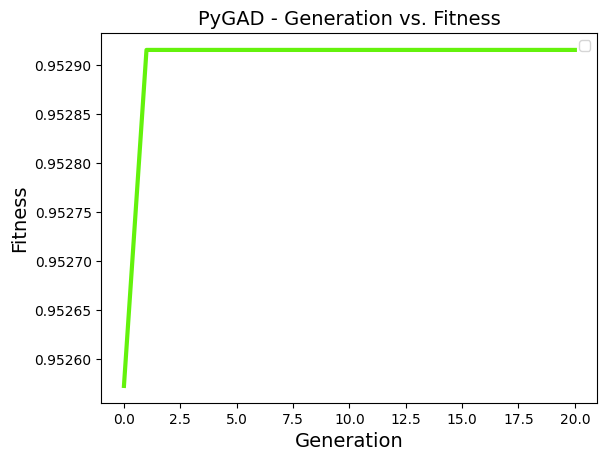

Best solution: [ 2.34637871  0.96900343 14.77180893  1.07900343]
Best fitness: 0.9529154519656554
[ 2.34637871  0.96900343 14.77180893  1.07900343]
0.5724769019080811
[[ 2.34637871  0.96900343 14.77180893  1.07900343]
 [ 2.34637871  3.09322163  3.41322163  3.20322163]
 [ 3.25322163  3.25322163 14.67899625  3.36322163]
 ...
 [ 3.25322163  3.09322163  3.41322163  3.20322163]
 [ 3.25322163  3.09322163  3.41322163  3.20322163]
 [ 3.25322163  3.25322163 14.67899625  3.36322163]]
Best fitness value reached after 1 generations.
AAAAHHHH: 4.591472227240448e-07
Instrument ID Best WSP instrument using pyroletic graphite
    	Source: L0 = 2.346378713475625 Å; sigma_L = 0.009964152965433019 Å
    	Precession device: type = wsp; theta_0 = 0.79 rad; By_min = 0.1mT; By_max = 63.0mT
    	L_1 = 14.77m; L_2 = 1.08m;  L_s = 0.97m
    	delta range from B strength: 0.79 - 459.15nm
    	delta limit for envelope FWHM >= 5.0mm: 4013.18nm
    	max delta for sampling at 10/s (f_0 = 10mm^-1): 2273.65nm
    	fina

In [96]:
import pygad

target_interval = (10e-9, 8000e-9)

def optimize_instrument(PG=True):
    L_max = 20.0 # m
    d_1 = 0.2 # m
    d_2 = 0.2 # m
    epsilon = 0.01 # m
    # If a PG is used, change permitted L0 range
    if PG:
        quality = 0.01
        gene_space = [{'low': 2.0, 'high': 4.6}, {'low': 1.0, 'high': 15.0}, {'low': 1.0, 'high': 15.0}, {'low': 1.0, 'high': 15.0}]
        monochrom_name = 'pyroletic graphite'
    else:
        quality = 0.1
        gene_space = [{'low': 7.0, 'high': 12.0}, {'low': 1.0, 'high': 15.0}, {'low': 1.0, 'high': 15.0}, {'low': 1.0, 'high': 15.0}]
        monochrom_name = 'velocity selector'

    def instrument_from_solution(solution):
        L0 = solution[0] * 1e-10
        L_s = solution[1]
        L_1 = solution[2]
        L_2 = solution[3]
        theta_0 = np.deg2rad(45)
        By_min = 0.1e-3
        By_max = 63e-3
        instr = Instrument('', 'wsp', L0, quality * L0 / FWHM_factor, theta_0, By_min, By_max, L_s, L_1, L_2)
        return instr
    
    def normalize_solution(instance):
        # Swap if the instrument lengths are the wrong way around
        if instance[2] < instance[3]:
            t = instance[2]
            instance[2] = instance[3]
            instance[3] = t
        # instance[1] = 
        instance[1] = min(instance[1], instance[3] - d_2 / 2 - epsilon)
        instance[2] = min(instance[2], L_max)
        min_dist = (d_1 + d_2) / 2 + epsilon
        prec_dist = instance[2] - instance[3]
        if prec_dist <= min_dist:
            delta = min_dist - prec_dist
            instance[2] += delta/2
            instance[3] -= delta/2
        return instance
    
    # Define the constraint function
    def apply_constraints(ga_instance):
        for chromosome_idx in range(ga_instance.population.shape[0]):
            ga_instance.population[chromosome_idx] = normalize_solution(ga_instance.population[chromosome_idx])
            
    # Create a callback function that applies the constraints
    def on_generation(ga_instance):
        apply_constraints(ga_instance)
        sol, fit, _ = ga_instance.best_solution()
        instr = instrument_from_solution(sol)
        delta_range = instr.delta_range()
        true_fit = log_overlap_percentage(delta_range, target_interval)
        print(f"Generation {ga_instance.generations_completed}: Best Fitness = {fit}; range: {delta_range}; ACTUAL FITNESS: {true_fit})")
        
    # Define the fitness function
    def fitness_func(ga_instance, solution, solution_idx):
        instr = instrument_from_solution(solution)
        L_1 = solution[2]
        L_1_0 = 4
        delta_range = instr.delta_range()
        # length_penalty = 0.01 * L_1 / L_1_0
        
        fitness = log_overlap_percentage(delta_range, target_interval) / 100.0
        # print(fitness)
        return fitness

    # Number of genes in each solution
    num_genes = 4

        
    # Initialize the GA instance
    ga_instance = pygad.GA(
        mutation_percent_genes = 25,
        num_generations=20,
        num_parents_mating=1000,
        fitness_func=fitness_func,
        save_best_solutions = True,
        sol_per_pop=10000,
        mutation_type="scramble",
        num_genes=num_genes,
        # suppress_warnings=True,
        parallel_processing=4,
        gene_space=gene_space,
        # keep_elitism=10,
        # keep_parents=50,
        on_generation=on_generation,
    )
 
    # Run the GA
    ga_instance.run()

    ga_instance.plot_fitness()
    apply_constraints(ga_instance)
    # Retrieve and print the best solution
    best_solution, best_fitness, best_solution_idx = ga_instance.best_solution()
    best_solution2 = ga_instance.population[best_solution_idx]
    print(f"Best solution: {best_solution}\nBest fitness: {best_fitness}")
    best_instr = instrument_from_solution(best_solution)
    fitness2 = fitness_func(ga_instance, best_solution, 0)
    print(best_solution2)
    print(fitness2)
    print(ga_instance.population)

    if ga_instance.best_solution_generation != -1:
        print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")
    best_instr.id = f'Best WSP instrument using {monochrom_name}'
    return best_instr

print("==========Best instrument compatible with pyroletic graphite monochromator==========")
pg_instr = optimize_instrument(PG = True)
print(str(pg_instr))

In [43]:
delta_range = pg_instr.delta_range()
# length_penalty = 0.01 * L_1 / L_1_0

fitness = log_overlap_percentage(delta_range, target_interval) 
np.log(delta_range), np.log(target_interval)
print(fitness)
# a,b = np.log(delta_range)
# a,b

75.8629347021962


# Milk sample (from dairy paper)

In [ ]:
delta_rho = 2.0e14 # 1/m^2 (?)
phi = 0.036
R = 50e-9
t = 2e-3
for (L0, _) in sources:
    st = s_t(R,t, L0 * 1e-10, phi, delta_rho)
    print(st)